# **Hello There!**
> In this notebook we have crop production data of india to perform 
> basic EDA on this dataset and for visualization of data**

**Importing the libraries required**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cs
%matplotlib inline
import chart_studio as cs
import plotly 
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
plotly.offline.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Loading up the data where eda will be done**

In [2]:
df1= pd.read_csv('datafile (1).csv')
df2=pd.read_csv('datafile (2).csv')
df3=pd.read_csv('datafile (3).csv')
df4=pd.read_csv('datafile.csv')

In [3]:
df1.sample(10)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
11,GRAM,Madhya Pradesh,9803.89,16873.17,1551.94,10.29
31,PADDY,Orissa,17478.05,25909.05,715.04,32.42
25,MOONG,Orissa,5483.54,8266.98,2614.14,3.01
28,MOONG,Andhra Pradesh,6684.18,13209.32,2228.97,5.90
13,GRAM,Maharashtra,12985.95,18679.33,2277.68,8.05
29,MOONG,Maharashtra,10780.76,15371.45,2261.24,6.70
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
12,GRAM,Uttar Pradesh,12833.04,21618.43,1882.68,10.93
26,MOONG,Rajasthan,6204.23,9165.59,2068.67,4.05


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


**We will use sample functoin to bring 10 random rows from the dataset**

In [5]:
df2.sample(10)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
15,Total Non-Food grains,155.4,156.8,141.2,143.2,168.4,126.6,128.6,131.5,126.7,136.5,122.8,122.0,107.4,113.1,123.4
6,Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
7,Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
53,Sugarcane,149.8,146.7,120.1,123.2,144.3,142.6,140.0,122.2,115.6,135.2,105.1,104.8,98.3,106.6,106.7
37,Rubber,215.5,208.6,216.5,210.1,210.1,98.6,138.1,143.8,149.2,149.2,218.5,151.1,151.9,140.9,140.9
48,Potato,135.7,174.2,210.5,223.8,259.1,142.2,148.8,175.1,175.8,178.4,95.5,117.1,120.2,127.4,145.2
40,Dry chilies,163.5,170.8,167.1,158.3,160.9,83.6,88.3,85.4,84.0,86.8,195.5,193.4,195.8,188.4,185.5
43,Arecanut,182.5,184.3,185.5,184.3,184.3,167.7,169.5,169.7,175.4,175.4,108.8,108.7,109.3,105.1,105.1
35,Tea,132.2,132.8,132.0,132.0,132.0,135.3,137.8,137.8,137.8,137.8,97.7,96.3,95.8,95.8,95.8
19,Rapeseed &Mustard,138.7,108.8,134.3,123.2,152.5,107.0,91.8,99.3,88.1,108.8,129.6,118.5,135.2,139.9,140.2


**The particular table was having columns name issue, we have correctly named it to perform EDA effeicientlly.**

In [6]:
df2_pd=df2
df2_pd.rename(columns={'Crop             ':'Crop'},inplace=True)
df2.columns

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

**Making sure by calling out values with key we changed it with**

In [7]:
df2['Crop']

0              Total Foodgrains
1                          Rice
2                         Wheat
3                         Jowar
4                         Bajra
5                         Maize
6                          Ragi
7                 Small millets
8                        Barley
9                Coarse Cereals
10                      Cereals
11                         Gram
12                        Arhar
13                 Other Pulses
14                 Total Pulses
15       Total Non-Food grains 
16               Total Oilseeds
17                    Groundnut
18                      Sesamum
19            Rapeseed &Mustard
20                      Linseed
21                  Castor seed
22                    Safflower
23                   Niger seed
24                    Sunflower
25                     Soyabean
26                Nine Oilseeds
27                      Coconut
28                  Cotton seed
29                 Total Fibers
30                 Cotton(lint)
31      

**Here we can know the dimension of a dataset through shape function**

In [8]:
df2.shape

(55, 16)

In [9]:
df3.sample(10)

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
32,Pearl Millet,HHB 226 (MH 1479),NaN,"Rajasthan, Gujarat, Haryana, Uttar Pradesh, Pu...",NaN
8,Wheat,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja...",NaN
59,Cluster Bean,HG 2-20,100,"Uttar Pradesh, Haryana, Gujarat and Rajasthan ...",NaN
44,Groundnut,GPBD 5,105-110,Jharkhand and Manipur in Kharif Season.,NaN
50,Lentil,Pant Lentil-7(Pant L-024),147,"Punjab, Haryana and Uttar Pradesh under in Rab...",NaN
31,Pearl Millet,RHB 177 (MH 1486),NaN,"Rajasthan, Haryana and Gujarat under rainfed l...",NaN
58,Cluster Bean,HG 884,110,"Uttar Pradesh, Madhya Pradesh, Haryana, Gujara...",NaN
70,Jute,SUDHANGSU (JBO-1),NaN,"West Bengal, Assam, Bihar and Orissa.",NaN
71,Jute,ARPITA (JBC-5),-,West Bengal and Assam under rainfed agro system.,NaN
43,Groundnut,Kadiri Harithandhra (K 1319),122,Karnataka and Maharashtra under timely sown ir...,NaN


In [10]:
df4.head(10)

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


**Using isna funciton to know if columns have null datas in them and then summing
it up to know no. of blank values in the columns**

In [11]:
df1.isna().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [12]:
df2.isna().sum()

Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64

In [13]:

df3.isna().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [14]:
df4.isna().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

**We have find out a situation df4 table and making sure the null values are replaced by mean of columns in the dataset**

In [15]:
mean=df4['2004-05'].mean(skipna= True)
df4['2004-05']=df4['2004-05'].fillna(mean)

In [16]:
mean= df4['2005-06'].mean(skipna=True)
df4['2005-06']=df4['2005-06'].fillna(mean)

In [17]:
mean= df4['2006-07'].mean(skipna= True)
df4['2006-07']=df4['2006-07'].fillna(mean)

In [18]:
mean= df4['2007-08'].mean(skipna=True)
df4['2007-08']=df4['2007-08'].fillna(mean)

In [19]:
mean= df4['2008-09'].mean(skipna=True)
df4['2008-09']=df4['2008-09'].fillna(mean)

In [20]:
mean=df4['2009-10'].mean(skipna=True)
df4['2009-10']=df4['2009-10'].fillna(mean)

In [21]:
mean=df4['2010-11'].mean(skipna=True)
df4['2010-11']=df4['2010-11'].fillna(mean)

In [22]:
mean=df4['2011-12'].mean(skipna=True)
df4['2011-12']=df4['2011-12'].fillna(mean)

**Trough dropna we have removed a row from the dataset to make data eda ready**

In [23]:
df4.dropna(subset=['Crop'],axis=0,inplace =True)

In [24]:
df4.isna().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

**To know the contents from a tables column we use unique function**

In [25]:
df3['Crop'].unique()

array(['Paddy', 'Wheat', 'Barley', 'Maize', 'Pearl Millet',
       'Finger Millet', 'Indian Mustard', 'Yellow Sarson', 'Linseed',
       'Groundnut', 'Sesame', 'Chickpea ', 'Bengal Gram', 'Lentil',
       'Fieldpea', 'French Bean', 'Mungbean', 'Urdbean', 'Cluster Bean',
       'Horse Gram', 'Sugarcane', 'Napier Bajra Hybrid', 'Oat',
       'Tall Fescue Grass', 'Cowpea (Fodder)', 'Jute', 'Mesta', 'Cotton',
       'Desi Cotton'], dtype=object)

**e have value_counts funtion to know a tables columns count of repeats in the data column**

In [26]:
count=df1['Crop'].value_counts()
count

Crop
ARHAR                   5
COTTON                  5
GRAM                    5
GROUNDNUT               5
MAIZE                   5
MOONG                   5
PADDY                   5
RAPESEED AND MUSTARD    5
SUGARCANE               5
WHEAT                   4
Name: count, dtype: int64

**We have plotted a figure to show a pie chart showing us share of diffrent crops in production in the year 2011-12**

***Q1. What was the share of crops in total prodcution in 2011-12?***

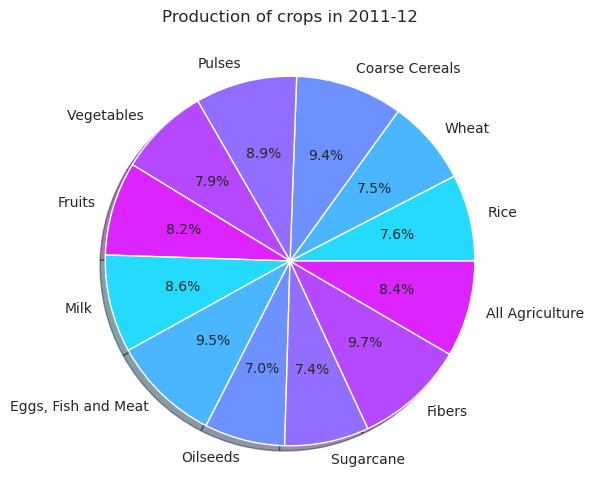

In [27]:
plt.figure(figsize=(12,6))
sns.set_style('white')
color=sns.color_palette('cool')
plt.pie(df4['2011-12'],
        labels=df4['Crop'],
        autopct='%0.1f%%',
        shadow= True,
        colors=color)
plt.title('Production of crops in 2011-12')
plt.show()

**We have plotted a countplot to know the no. varities of each crops which is prouduced in india**

***Q2. What crops has diffrent kinds of vareities and who has the most varieties in all these crops?***

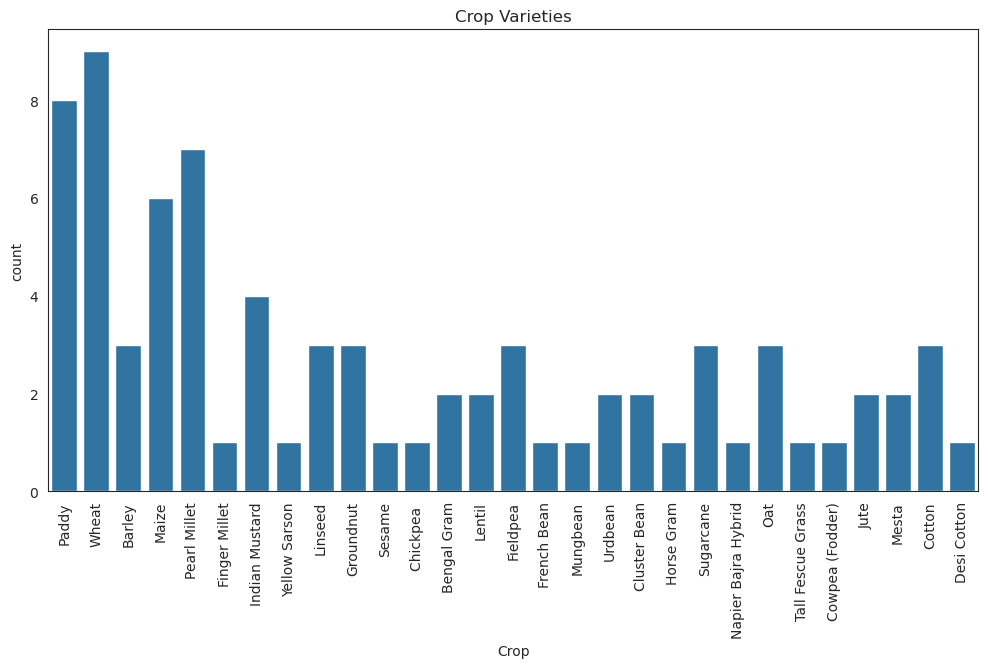

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=df3['Crop'],data=df3)
plt.xticks(rotation='vertical')
plt.xlabel('Crop')
plt.ylabel('count')
plt.title('Crop Varieties')
plt.show()

Wheat has a the most amount of varieties in all the crops

**We have plotted bar chart to show total yeild of diifrent crops in the year 2010-11**

***Q3. What are the diffrent crops yeild in the year 2010-11?***

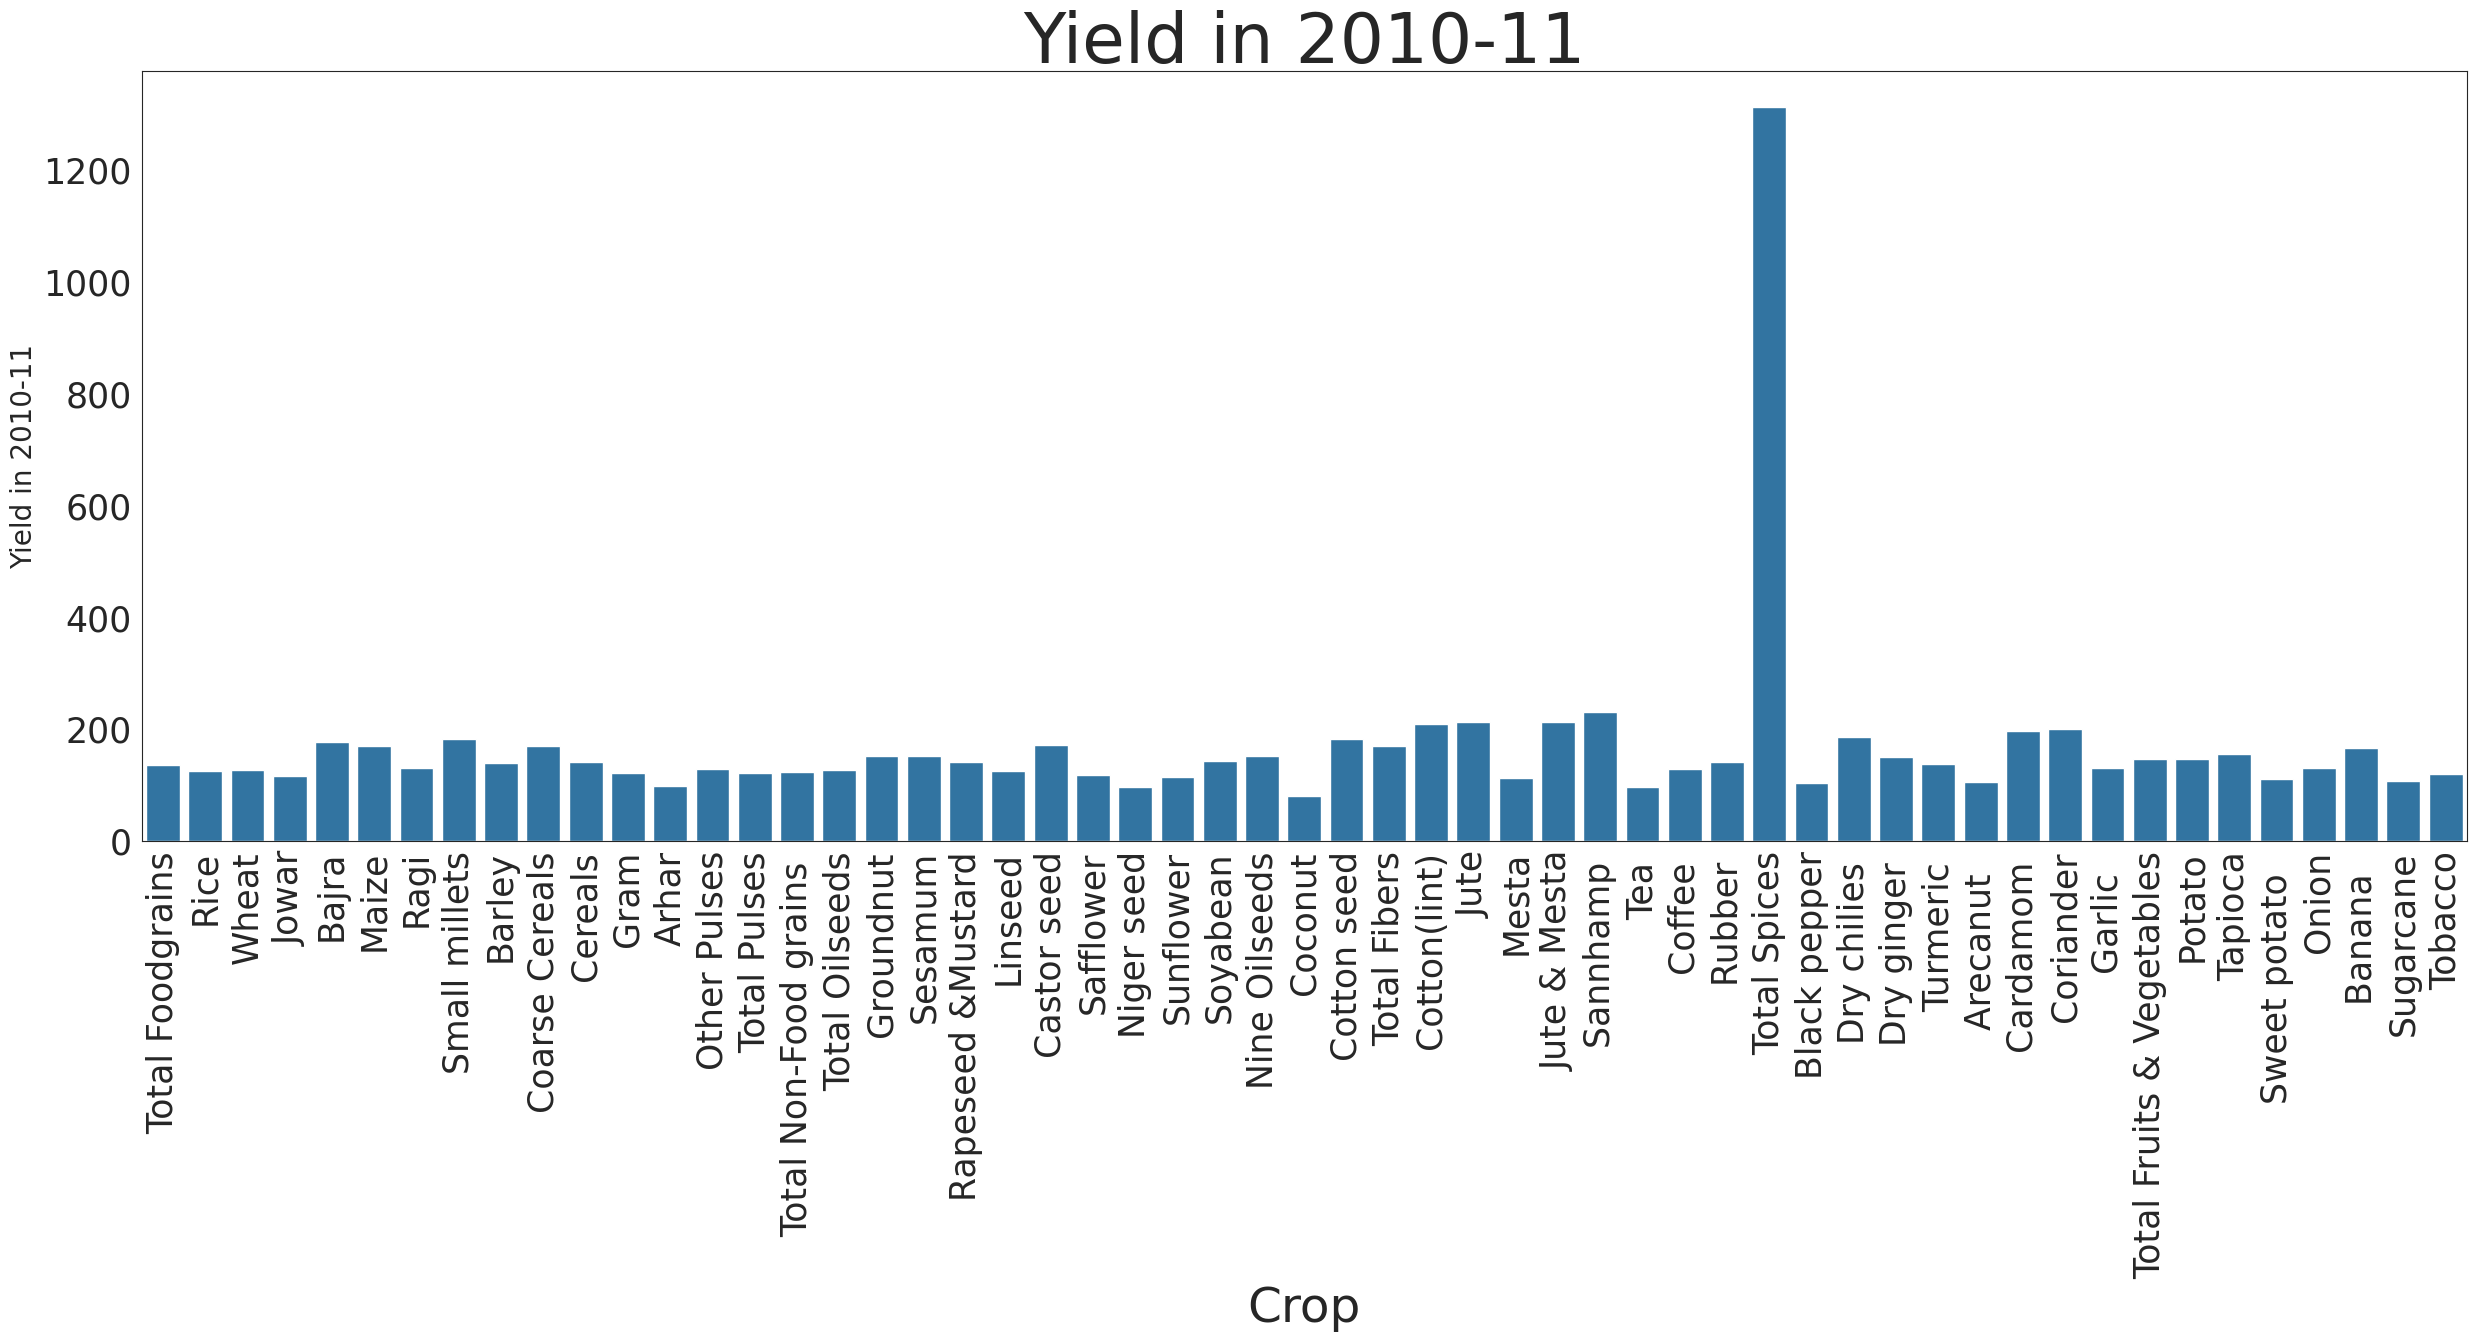

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x=df2['Crop'],y=df2['Yield 2010-11'],data=df2)
plt.xticks(rotation='vertical',fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Crop',fontsize=35)
plt.ylabel('Yield in 2010-11',fontsize=20)
plt.title('Yield in 2010-11',fontsize=50)
plt.show()

Total Spices has the largest yeild in the year 2010-11

**The process below we have done to group the data and its values to make a heirarchy and use this to view data diffrently.**

In [30]:
s=df1.groupby('Crop')
s.mean(numeric_only=True)

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
Crop,,,,
ARHAR,13607.646,21719.8460,2491.7300,8.406
COTTON,28286.874,42958.1980,2271.9660,18.772
GRAM,11719.510,19308.7740,1792.6000,10.558
GROUNDNUT,21282.782,28188.0760,2704.6380,10.288
MAIZE,16610.150,23837.2980,774.5660,30.798
MOONG,7118.670,10776.3960,2990.1000,4.196
PADDY,22810.140,35768.2220,727.7340,46.296
RAPESEED AND MUSTARD,12260.490,21223.4320,1415.5940,14.320
SUGARCANE,52164.716,79655.0260,98.6480,790.496


we have used masking to use the data we need from the table

In [31]:
cols=df1.columns
cols
color=sns.color_palette('PuOr')

**Plotiing a bar chart by using crops as basis to evalueate all the attributes of the data.**

***Q4. What costs does one bear if they decide to grow a particular crop in their farm?***

<Axes: xlabel='Crop'>

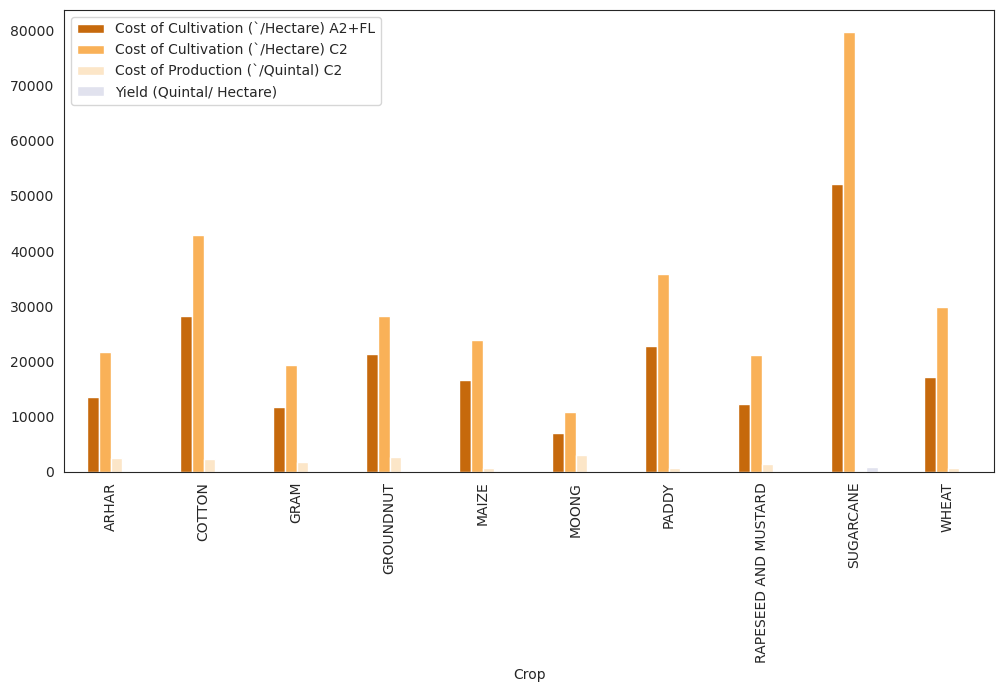

In [32]:
df1.groupby('Crop')[cols].mean(numeric_only=True).plot(kind='bar', figsize=(12,6),color=color)

Sugarcane has the highest cost of prodcution in all the crops

**A pie chart to show the yeild capacity of diffrent states on a given area.**

***Q5. What is share of states in total yeild of crops?***

In [33]:
fig=px.pie(df1,values=df1.groupby('State')[cols[-1]].sum(),names=df1.groupby('State')[cols[-1]],
           title='State wise yeild(Quintal/Hectare) ')
fig.show()

In [34]:
fig.write_image("q5.jpeg", format='jpeg')

**Karnatka & Tamil Nadu has the most capacity in terms of yeild(quintal/heactare)**

In [35]:
col=df2.columns
col= col.drop(col[5:16])
col=col.drop(col[0])
col

Index(['Production 2006-07', 'Production 2007-08', 'Production 2008-09',
       'Production 2009-10'],
      dtype='object')

In [36]:
t=df2[['Crop','Production 2006-07','Production 2007-08','Production 2008-09','Production 2009-10','Production 2010-11']]
t.rename(index=t['Crop'],inplace=True)

***Q6. Which crop has the biggest combined production?***

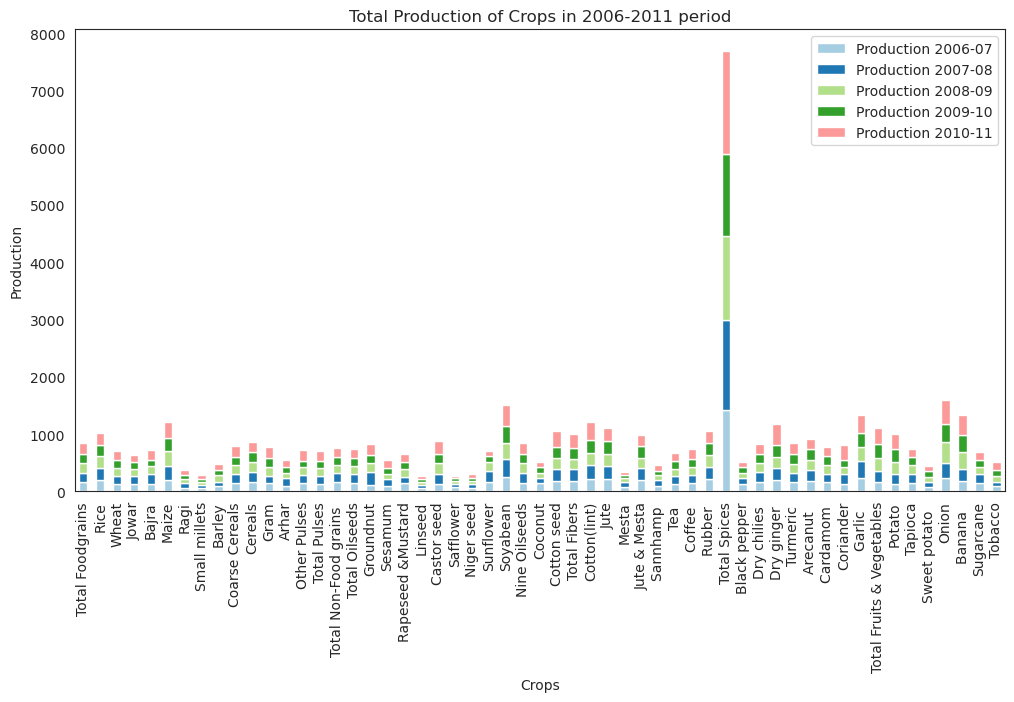

In [37]:
t.plot(kind='bar',stacked= True,figsize=(12,6),color=sns.color_palette('Paired'),cmap=True)
plt.title('Total Production of Crops in 2006-2011 period')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.xticks(fontsize=10)
plt.show()

We can see in the graph that total spices has the biggest contribution for the production and is growing every year as well.

In [38]:
e=df1.groupby(['Crop','State'])['Yield (Quintal/ Hectare) '].sum()
e=pd.DataFrame(e)
e

Yield (Quintal/ Hectare) 
Crop                 State                                    
ARHAR                Andhra Pradesh                       6.42
                     Gujarat                              9.59
                     Karnataka                            7.47
                     Maharashtra                          8.72
                     Uttar Pradesh                        9.83
COTTON               Andhra Pradesh                      17.83
                     Gujarat                             19.05
                     Haryana                             19.90
                     Maharashtra                         12.69
                     Punjab                              24.39
GRAM                 Andhra Pradesh                      16.69
                     Madhya Pradesh                      10.29
                     Maharashtra                          8.05
                     Rajasthan                            6.83
                     Uttar Pradesh                       10.93
GROUNDNUT            Andhra Pradesh                      11.97
                     Gujarat                             13.45
                     Karnataka                            4.71
                     Maharashtra                          9.33
                     Tamil Nadu                          11.98
MAIZE                Andhra Pradesh                      42.68
                     Bihar                               42.95
                     Karnataka                           31.10
                     Rajasthan                           23.56
                     Uttar Pradesh                       13.70
MOONG                Andhra Pradesh                       5.90
                     Karnataka                            1.32
                     Maharashtra                          6.70
                     Orissa                               3.01
                     Rajasthan                            4.05
PADDY                Andhra Pradesh                      56.00
                     Orissa                              32.42
                     Punjab                              67.41
                     Uttar Pradesh                       36.61
                     West Bengal                         39.04
RAPESEED AND MUSTARD Gujarat                             11.61
                     Haryana                             19.94
                     Madhya Pradesh                      12.94
                     Rajasthan                           13.54
                     Uttar Pradesh                       13.57
SUGARCANE            Andhra Pradesh                     757.92
                     Karnataka                          986.21
                     Maharashtra                        744.01
                     Tamil Nadu                        1015.45
                     Uttar Pradesh                      448.89
WHEAT                Madhya Pradesh                      23.59
                     Punjab                              39.83
                     Rajasthan                           37.19
                     Uttar Pradesh                       34.99

***Q7. What is the states best yeild capacity crop?***

In [39]:
plt.figure(figsize=(30,18),dpi=100)
o=px.sunburst(df1,path=['State','Crop'],values='Yield (Quintal/ Hectare) ',
              hover_data=['Yield (Quintal/ Hectare) '])
o.show()

<Figure size 3000x1800 with 0 Axes>

In [40]:
o.write_image("q7.jpeg", format='jpeg')

We can see majorly sugarcane has the highest yeild allover in major state

In [41]:
df4t=df4.transpose()
df4t.rename(columns=df4t.iloc[0],inplace= True)
df4t=df4t[1:]
df4t

,Rice,Wheat,Coarse Cereals,Pulses,Vegetables,Fruits,Milk,"Eggs, Fish and Meat",Oilseeds,Sugarcane,Fibers,All Agriculture
2004-05,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2005-06,101.0,101.0,107.0,108.0,109.0,99.0,97.0,102.0,86.0,96.0,92.0,99.0
2006-07,99.0,112.0,110.0,134.0,103.0,99.0,98.0,101.0,85.0,91.0,91.0,101.0
2007-08,105.0,115.0,115.0,124.0,118.0,98.0,98.0,100.0,97.0,87.0,96.0,104.0
2008-09,112.0,117.0,113.0,124.0,113.0,102.0,98.0,99.0,104.0,80.0,109.0,106.0
2009-10,121.0,127.0,123.0,146.0,124.0,104.0,112.0,116.0,103.0,81.0,107.0,115.0
2010-11,117.0,120.0,122.0,137.0,128.0,114.0,123.0,133.0,99.0,109.0,138.0,123.0
2011-12,110.0,108.0,136.0,129.0,115.0,119.0,124.0,137.0,102.0,107.0,140.0,122.0


In [42]:
p=df4t.columns

***Q8. What is the crop production in the time frame of 2004-2012?***

In [43]:
a=px.line(df4t,markers=True)

a.show()

In [44]:
a.write_image("q8.jpeg", format='jpeg')

We can see fluctuations of crop produce in and fiber has climbed a major portion between 2010 and 2011

## market Segmentation

In [45]:
merged_df = pd.merge(df1, df2, on='Crop', how='left')
merged_df = pd.merge(merged_df, df3, on='Crop', how='left')
merged_df = pd.merge(merged_df, df4, on='Crop', how='left')
merged_df=merged_df.iloc[:,:6]
merged_df

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


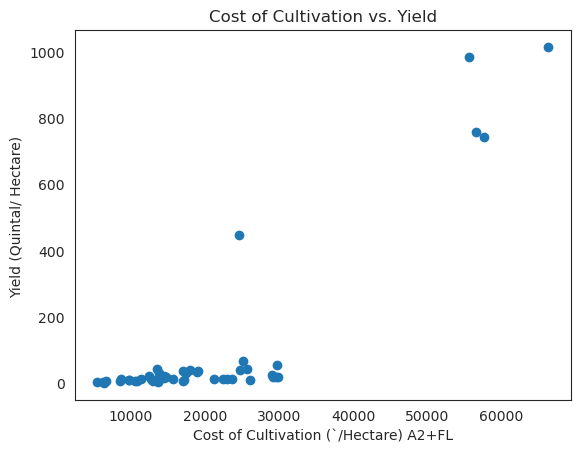

In [46]:
plt.scatter(merged_df['Cost of Cultivation (`/Hectare) A2+FL'], merged_df['Yield (Quintal/ Hectare) '])
plt.xlabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.ylabel('Yield (Quintal/ Hectare) ')
plt.title('Cost of Cultivation vs. Yield')
plt.show()


In [47]:
merged_df['Crop']=merged_df['Crop'].astype('category').cat.codes
merged_df['State']=merged_df['State'].astype('category').cat.codes

<Axes: >

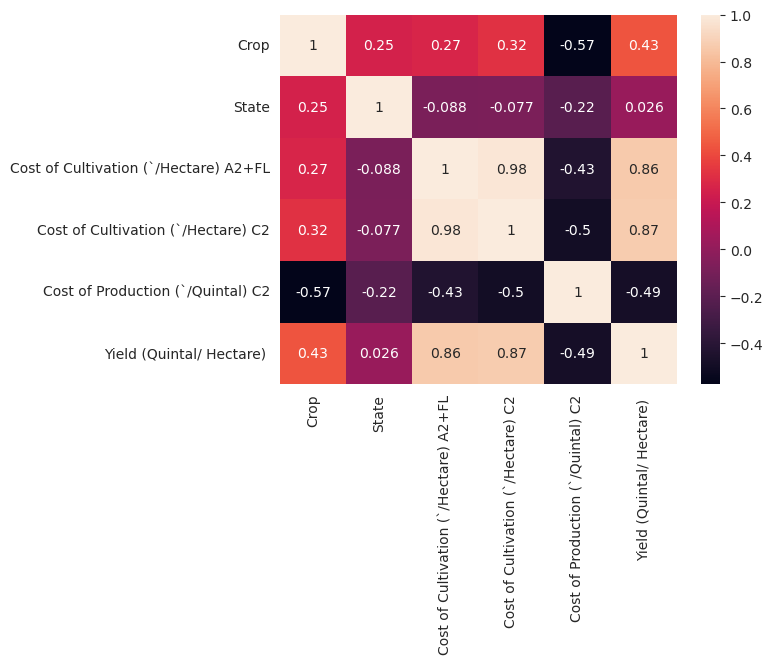

In [48]:
sns.heatmap(merged_df.corr(),annot=True)

In [49]:
col=merged_df.columns[2:]
col
scaler = StandardScaler()
merged_df[col] = scaler.fit_transform(merged_df[col])

In [50]:
merged_df

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,0,11,-0.787455,-0.416695,0.293522,-0.363530
1,0,4,-0.727920,-0.745914,0.504658,-0.373251
2,0,2,-0.513675,-0.593915,0.253976,-0.364518
3,0,0,-0.246744,-0.361646,1.874447,-0.377576
4,0,6,-0.240866,-0.306411,1.056330,-0.368102
5,1,6,0.249428,0.088094,0.840238,-0.351749
6,1,8,0.646948,0.978607,0.350404,-0.303557
7,1,0,0.653927,0.673317,0.813283,-0.330578
8,1,2,0.689340,0.538258,0.510875,-0.325553
9,1,3,0.711905,0.636185,0.463411,-0.322051


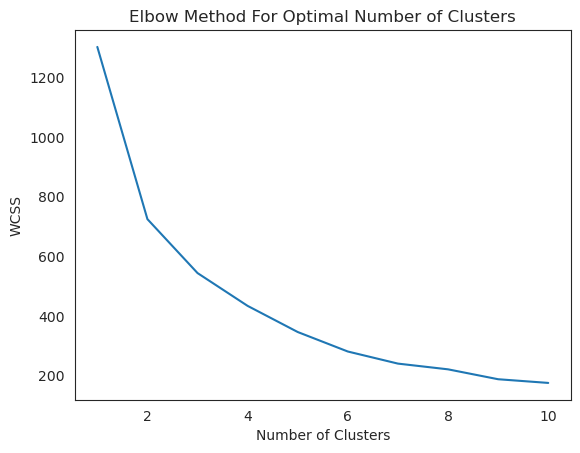

In [51]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(merged_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [52]:
silhoute_scores=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(merged_df)
    silhoute_scores.append(silhouette_score(merged_df,kmeans.labels_))
silhoute_scores

[0.3713737389795099,
 0.3104266206322871,
 0.2897781735496143,
 0.30335447405287297,
 0.31265713870340595,
 0.3087801490907968,
 0.2807523581034116,
 0.29101923204890723,
 0.26027415781376917]

Kth value 2 i.e two clusters

In [53]:
kmeans=KMeans(n_clusters=2,random_state=2)
kmeans.fit(merged_df)
df1['Labels']=kmeans.labels_

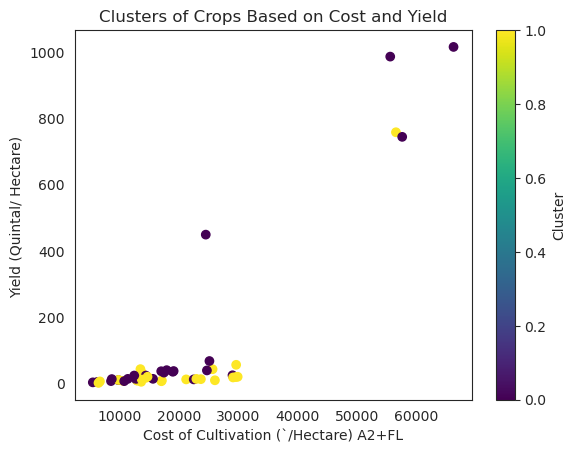

In [54]:
# Visualize clusters for selected features
plt.scatter(df1['Cost of Cultivation (`/Hectare) A2+FL'], df1['Yield (Quintal/ Hectare) '], c=df1['Labels'], cmap='viridis')
plt.xlabel('Cost of Cultivation (`/Hectare) A2+FL')
plt.ylabel('Yield (Quintal/ Hectare) ')
plt.title('Clusters of Crops Based on Cost and Yield')
plt.colorbar(label='Cluster')
plt.show()

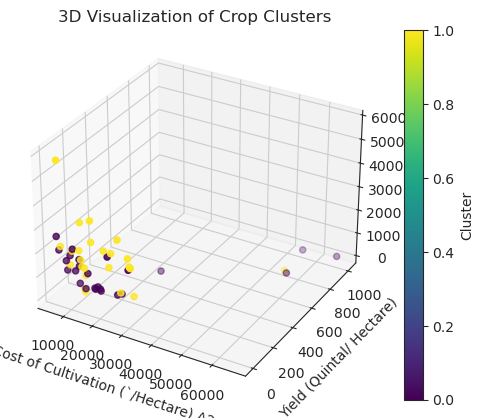

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df1['Cost of Cultivation (`/Hectare) A2+FL'],
                df1['Yield (Quintal/ Hectare) '],
                df1['Cost of Production (`/Quintal) C2'],
                c=df1['Labels'], cmap='viridis')
ax.set_xlabel('Cost of Cultivation (`/Hectare) A2+FL')
ax.set_ylabel('Yield (Quintal/ Hectare) ')
ax.set_zlabel('Production 2010-11')
ax.set_title('3D Visualization of Crop Clusters')
plt.colorbar(sc, label='Cluster')
plt.show()

In [56]:
df1[df1['Labels']==0].describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Labels
count,25.000000,25.000000,25.000000,25.000000,25.0
mean,21008.136800,33225.189600,1175.001600,146.426800,0.0
std,15975.341557,22936.450527,770.103264,305.391883,0.0
min,5483.540000,8266.980000,85.790000,3.010000,0.0
25%,11385.700000,19810.290000,683.580000,11.980000,0.0
50%,17022.000000,25909.050000,810.250000,23.590000,0.0
75%,24538.320000,35423.480000,1882.680000,39.040000,0.0
max,66335.060000,89025.270000,2614.140000,1015.450000,0.0


<Axes: >

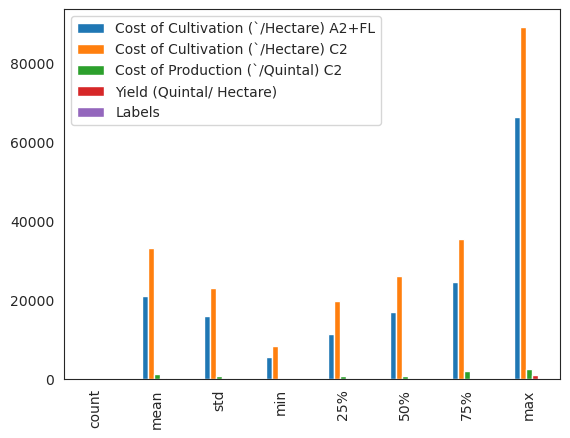

In [57]:
df1[df1['Labels']==0].describe().plot(kind='bar')

In [58]:
df1[df1['Labels']==1].describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Labels
count,24.000000,24.000000,24.000000,24.00000,24.0
mean,19692.079583,29426.622083,2084.637917,47.73250,1.0
std,10797.576560,16916.320238,1220.172398,151.87027,0.0
min,6440.640000,7868.640000,119.720000,1.32000,1.0
25%,13502.645000,18982.495000,1476.735000,8.55250,1.0
50%,15883.465000,26016.175000,2149.905000,12.33000,1.0
75%,25784.982500,34288.077500,2543.330000,19.91000,1.0
max,56621.160000,91442.630000,5777.480000,757.92000,1.0


<Axes: >

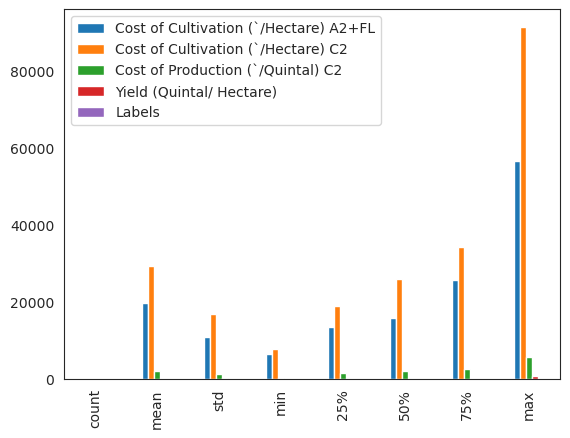

In [59]:
df1[df1['Labels']==1].describe().plot(kind='bar')